In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [7]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# 1. EDA

### Overview on sale prices, our main target

C:\Users\ali80\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

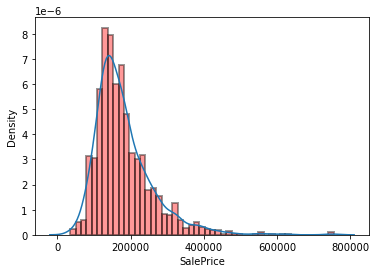

In [8]:
sns.distplot(df["SalePrice"],hist_kws = dict(edgecolor = "black",linewidth = 2,color = "r"))


* Dist plot is a bit skewed, maybe should be normalized in future

In [9]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

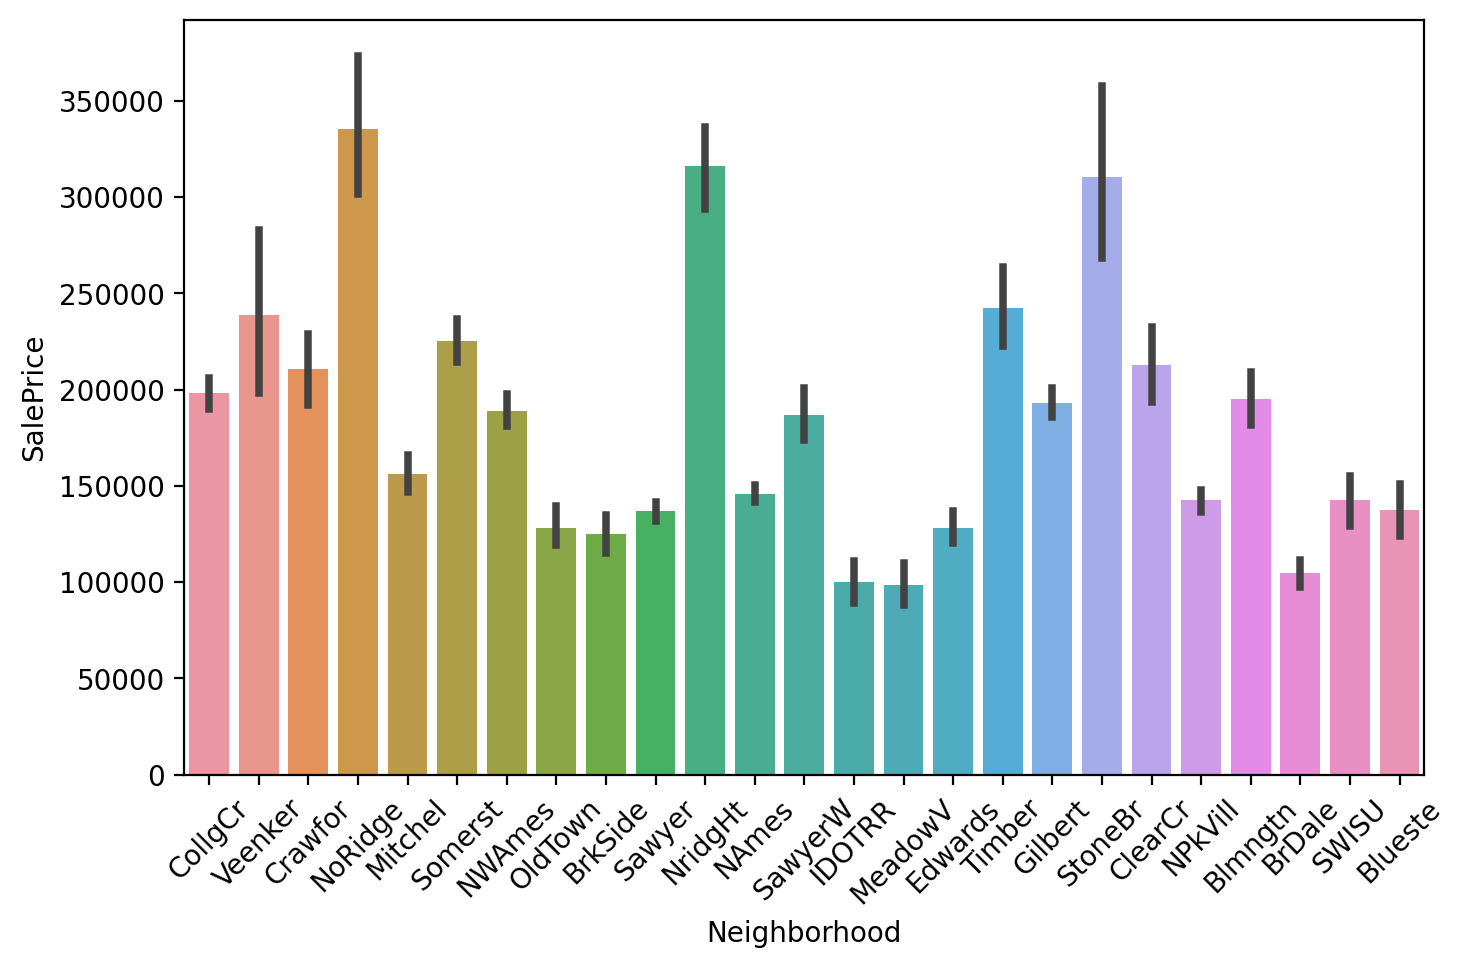

In [10]:
plt.figure(figsize=(8,5),dpi=200)
sns.barplot(x = df["Neighborhood"], y = df["SalePrice"])
plt.xticks(rotation=45)
plt.show()

### Neighberhoods Tiers:
 1. NoRidge - NridgHt - StoneBr
 2. Veenker - Somerst - Timber
 3. Some other
 4. Worst : SawyerW - IDOTRR - Blmngtn


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

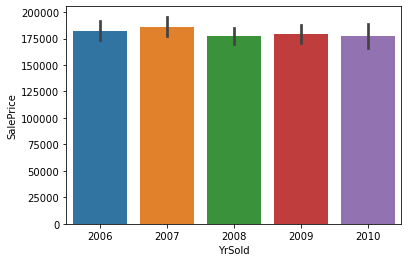

In [11]:
sns.barplot(x = df["YrSold"], y = df["SalePrice"])

### A sudden dropoff after 2007 Due to financial crisis

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

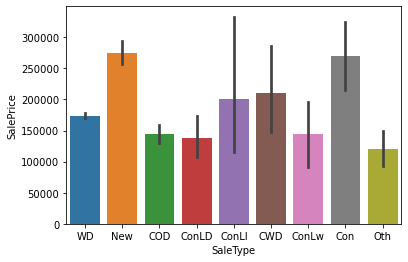

In [12]:
sns.barplot(x = df["SaleType"], y = df["SalePrice"])

### New built houses sold for more than the other
* Con houses price is interesting
* ConLi has a very sharp variance (Should check it)


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

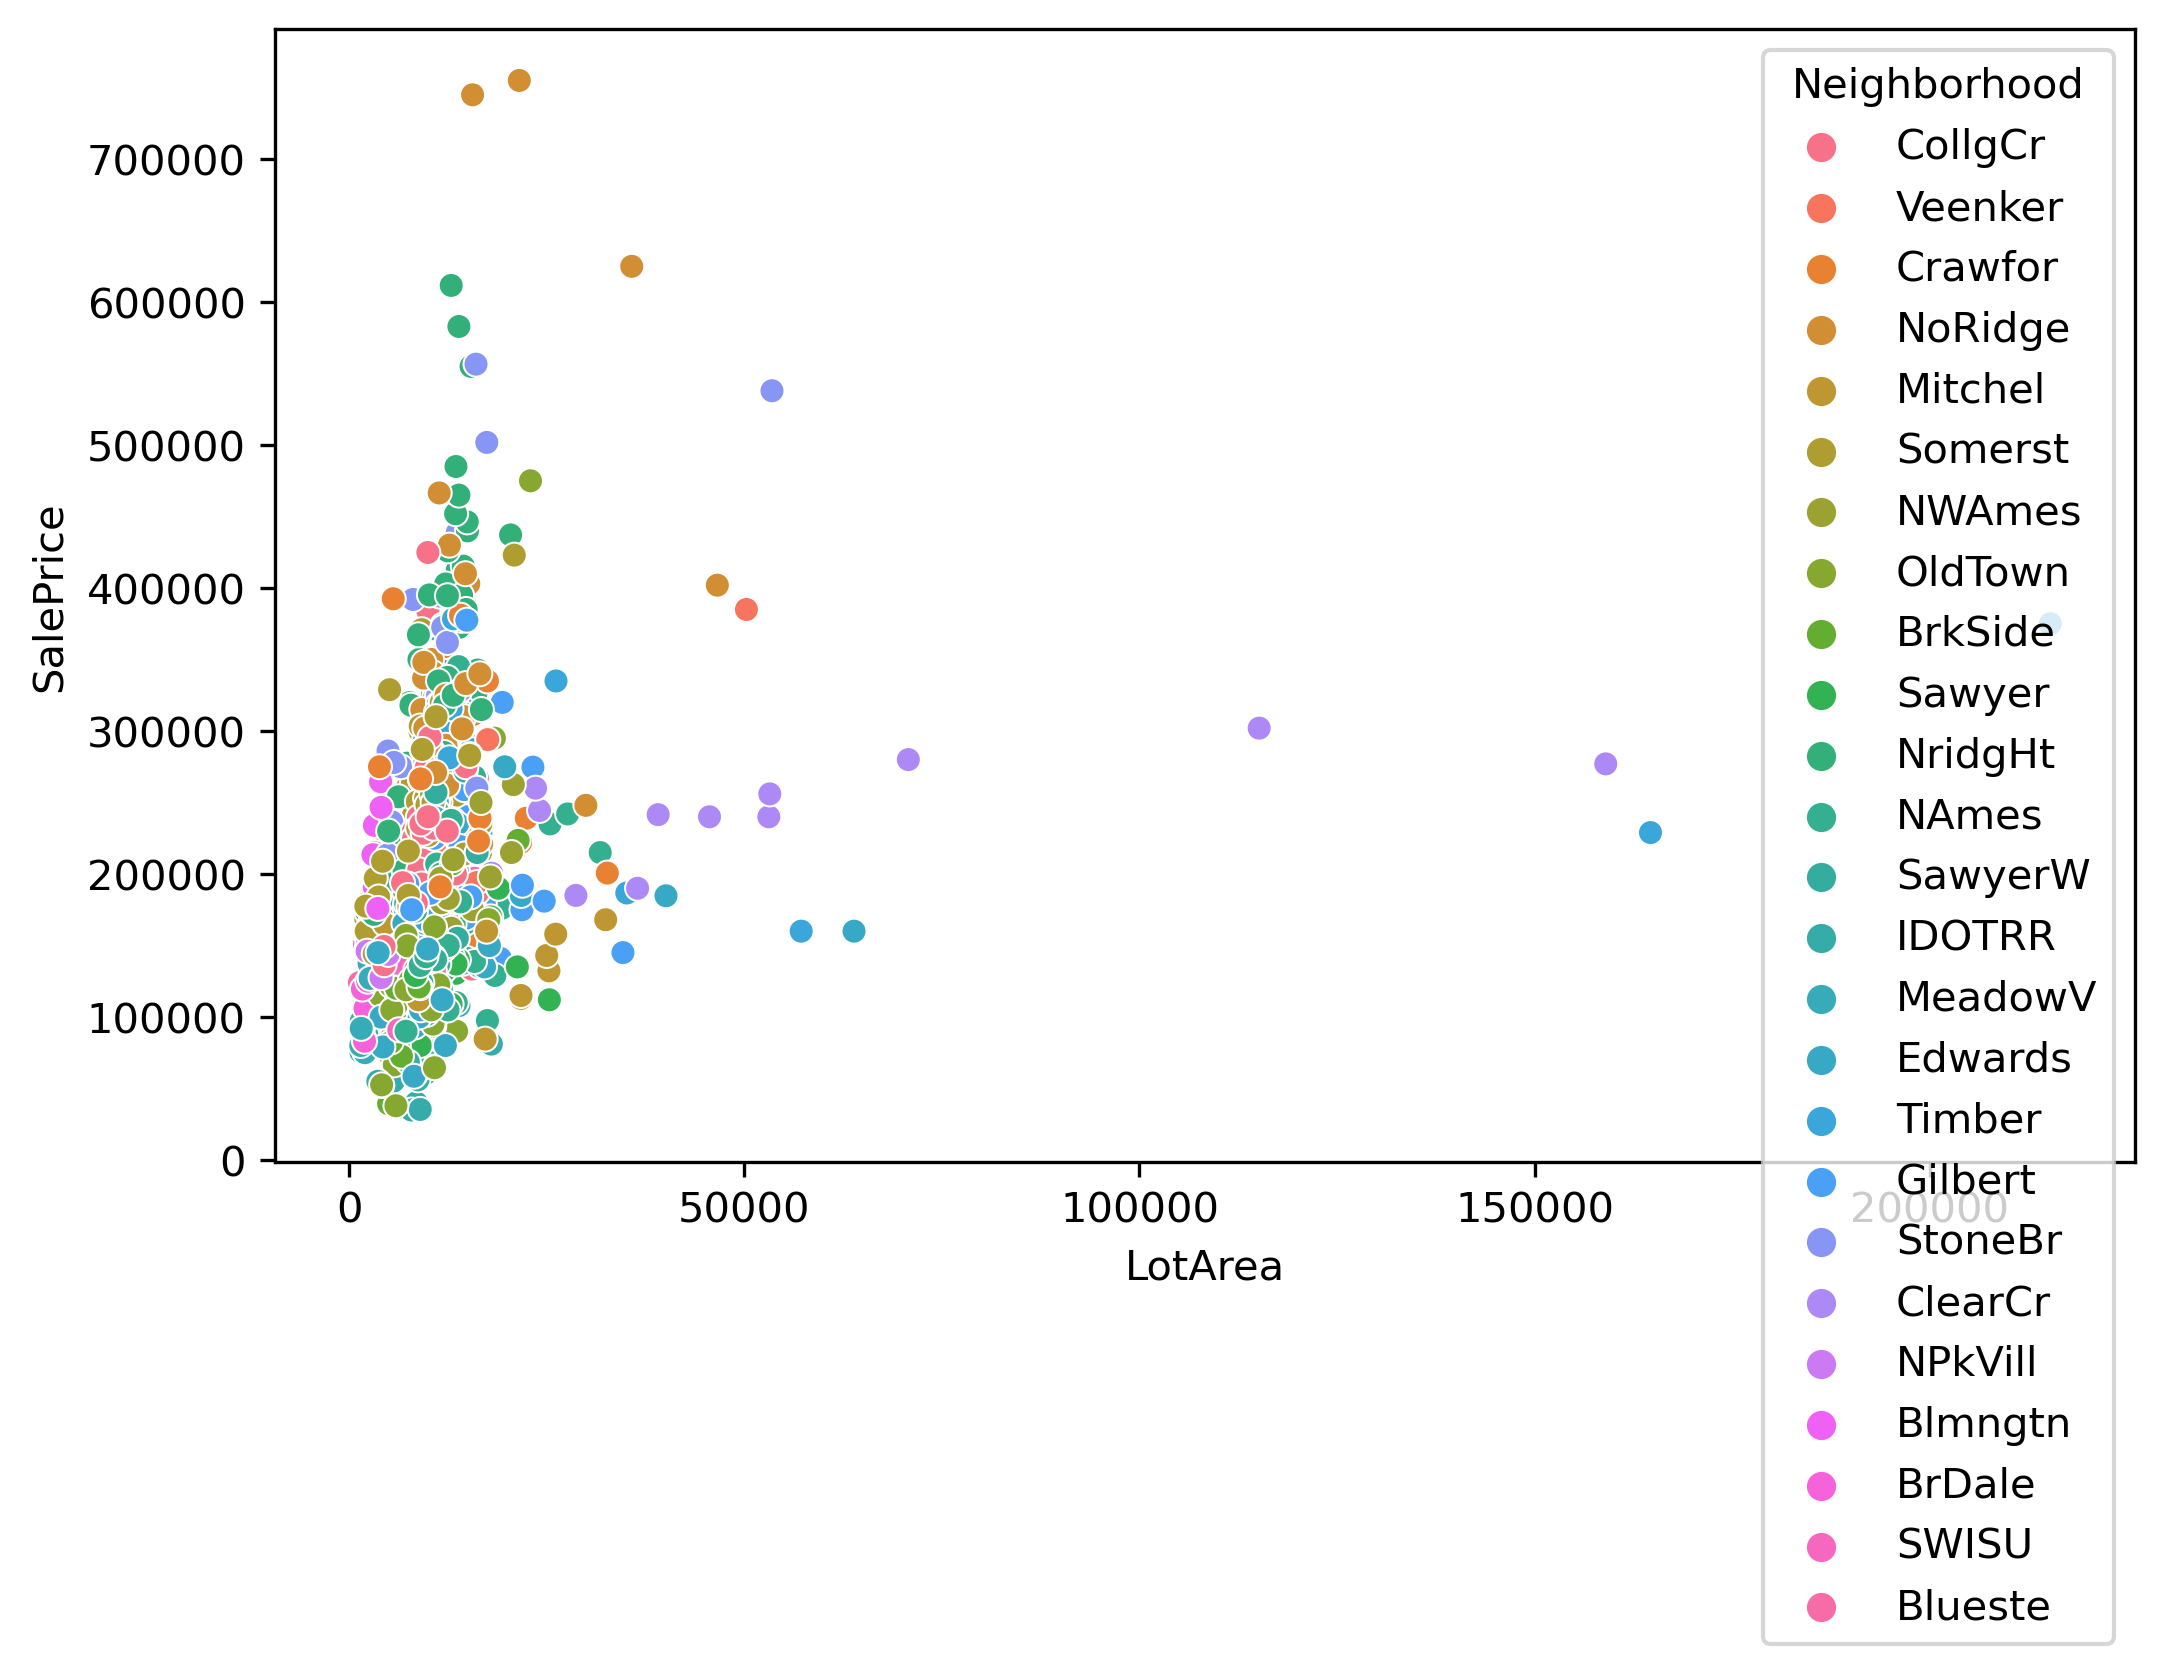

In [13]:
plt.figure(figsize=(8,5),dpi = 300)
sns.scatterplot(x = df["LotArea"], y = df["SalePrice"], hue = df["Neighborhood"])

* Many outliers in Clear Cr and NoRidge

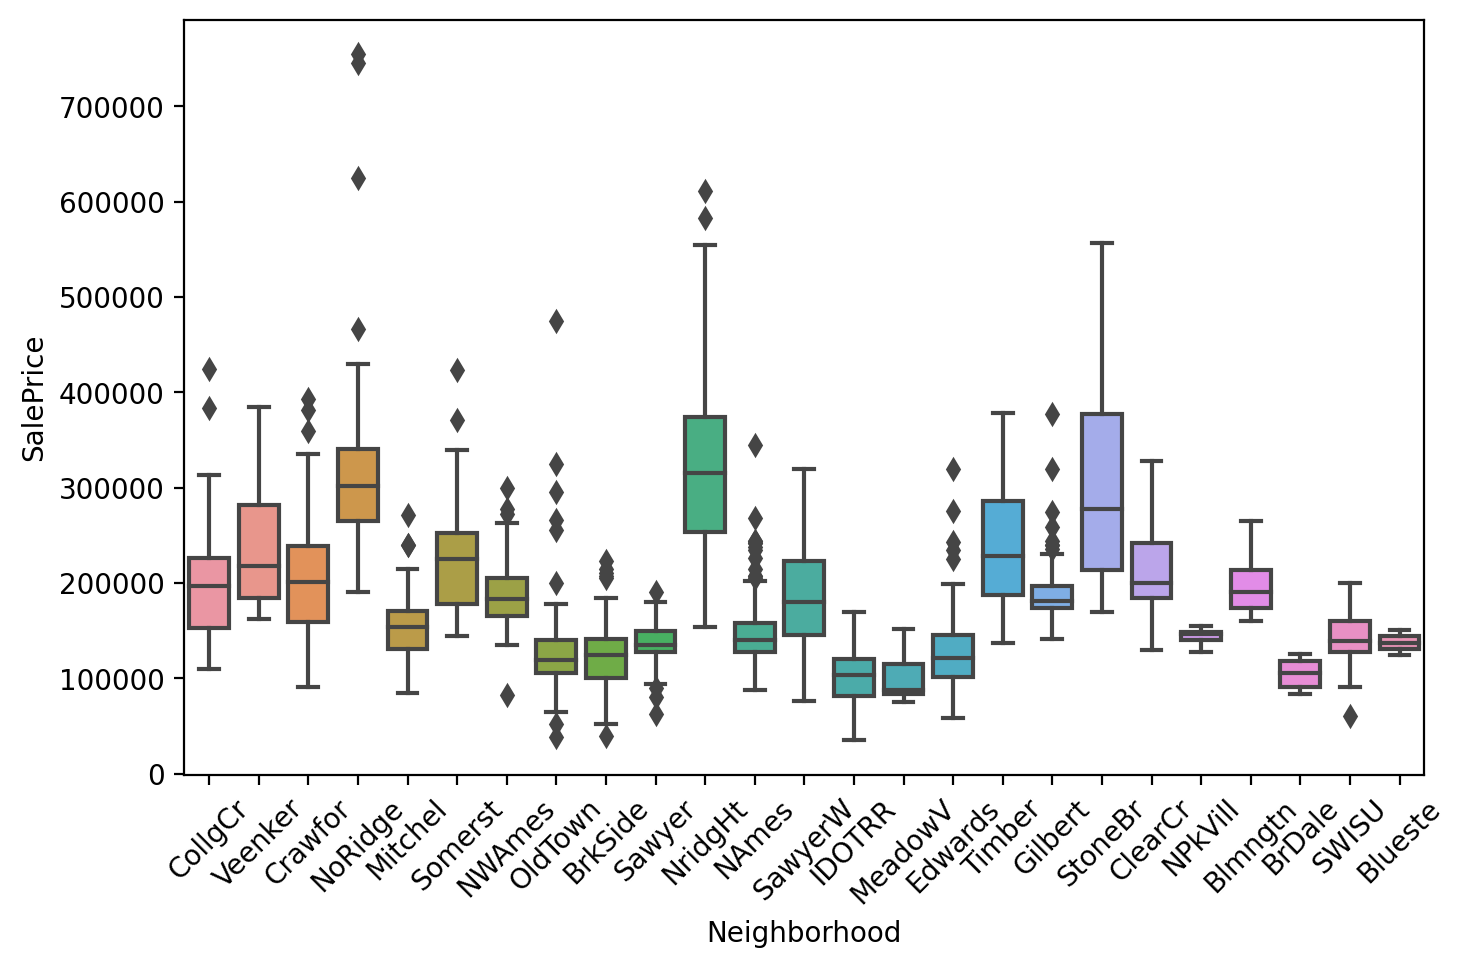

In [14]:
plt.figure(figsize=(8,5),dpi=200)
sns.boxplot(x = df["Neighborhood"], y = df["SalePrice"])
plt.xticks(rotation=45)
plt.show()

### Tier list changed based on boxplot (It's more accurate)
* Sawyer & Gilbert & Crawfor are expensive neighberhoods


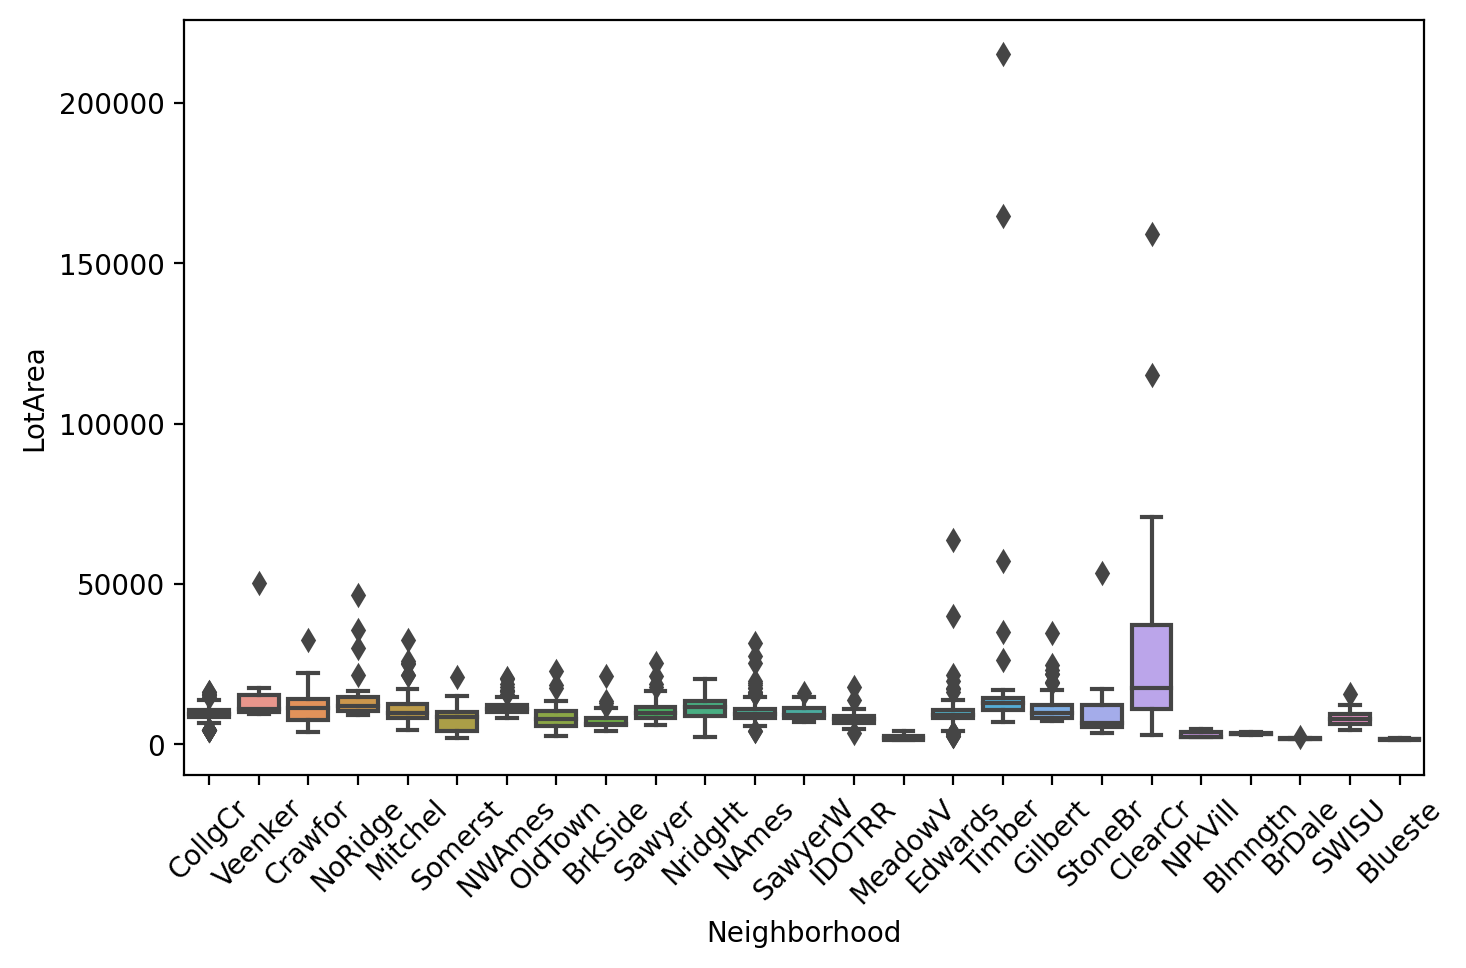

In [15]:
plt.figure(figsize=(8,5),dpi=200)
sns.boxplot(x = df["Neighborhood"], y = df["LotArea"])
plt.xticks(rotation=45)
plt.show()

### Why StoneBr has a lot of LotArea? (Maybe it's not residental)
* Now should group the nighberhoods by the residental type

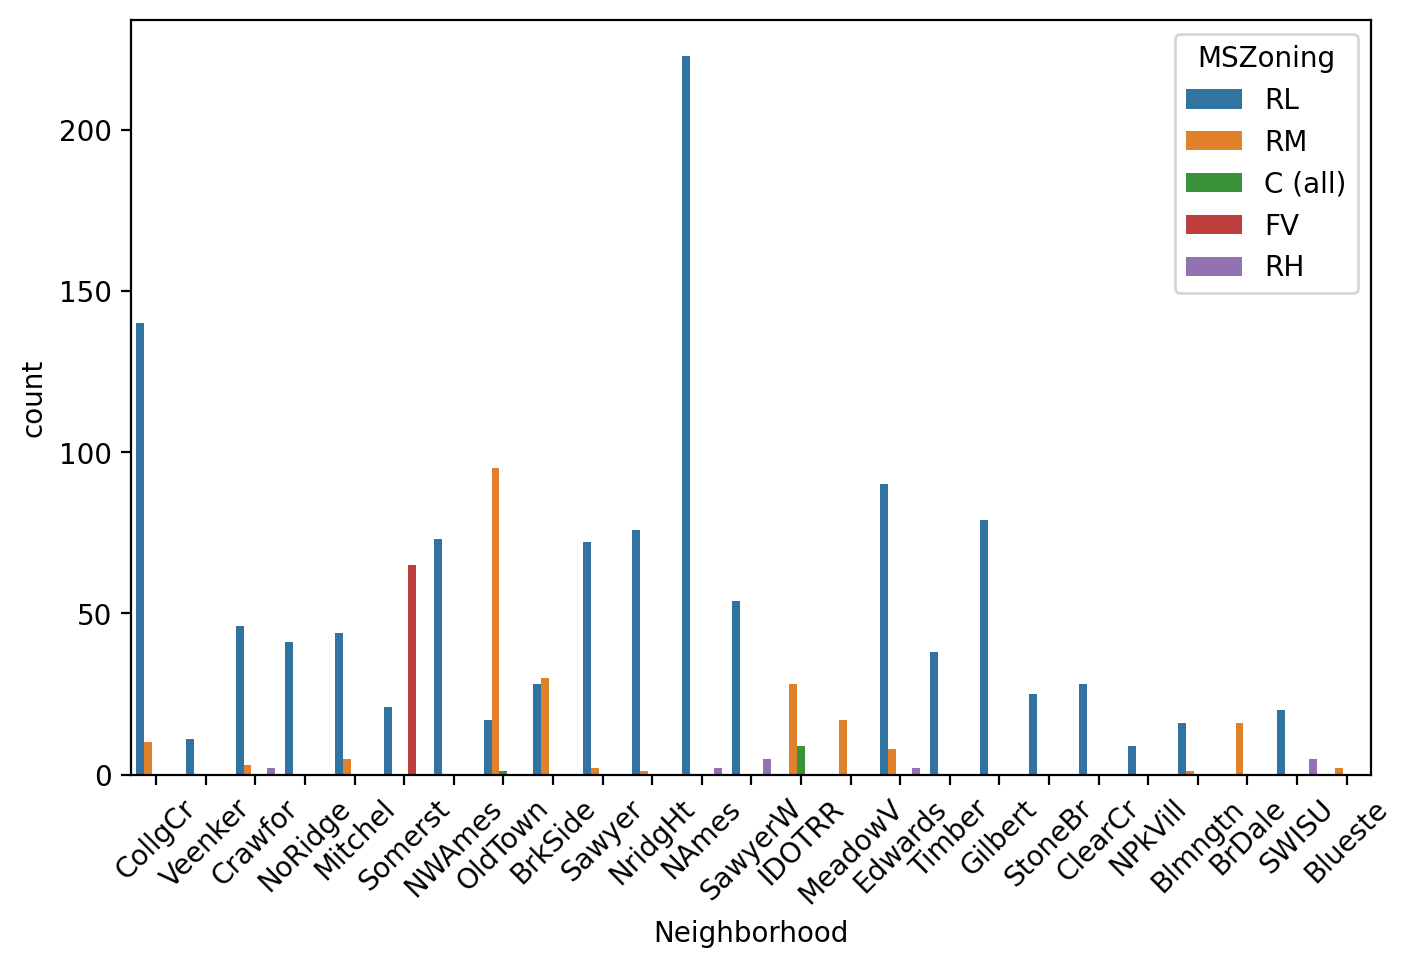

In [16]:
plt.figure(figsize=(8,5),dpi=200)
sns.countplot(x = df["Neighborhood"], hue=df["MSZoning"])
plt.xticks(rotation=45)
plt.show()

* Somerst is a village residual area
* IDOTRR is a commercial area

In [17]:
df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

* RL Low density residual
* RM Medium //
* RH High //
* FV Floating Village
* C Commercial

In [18]:
a = df[df["MSZoning"] != "RL"]

### Dropped RL type for a better comparison

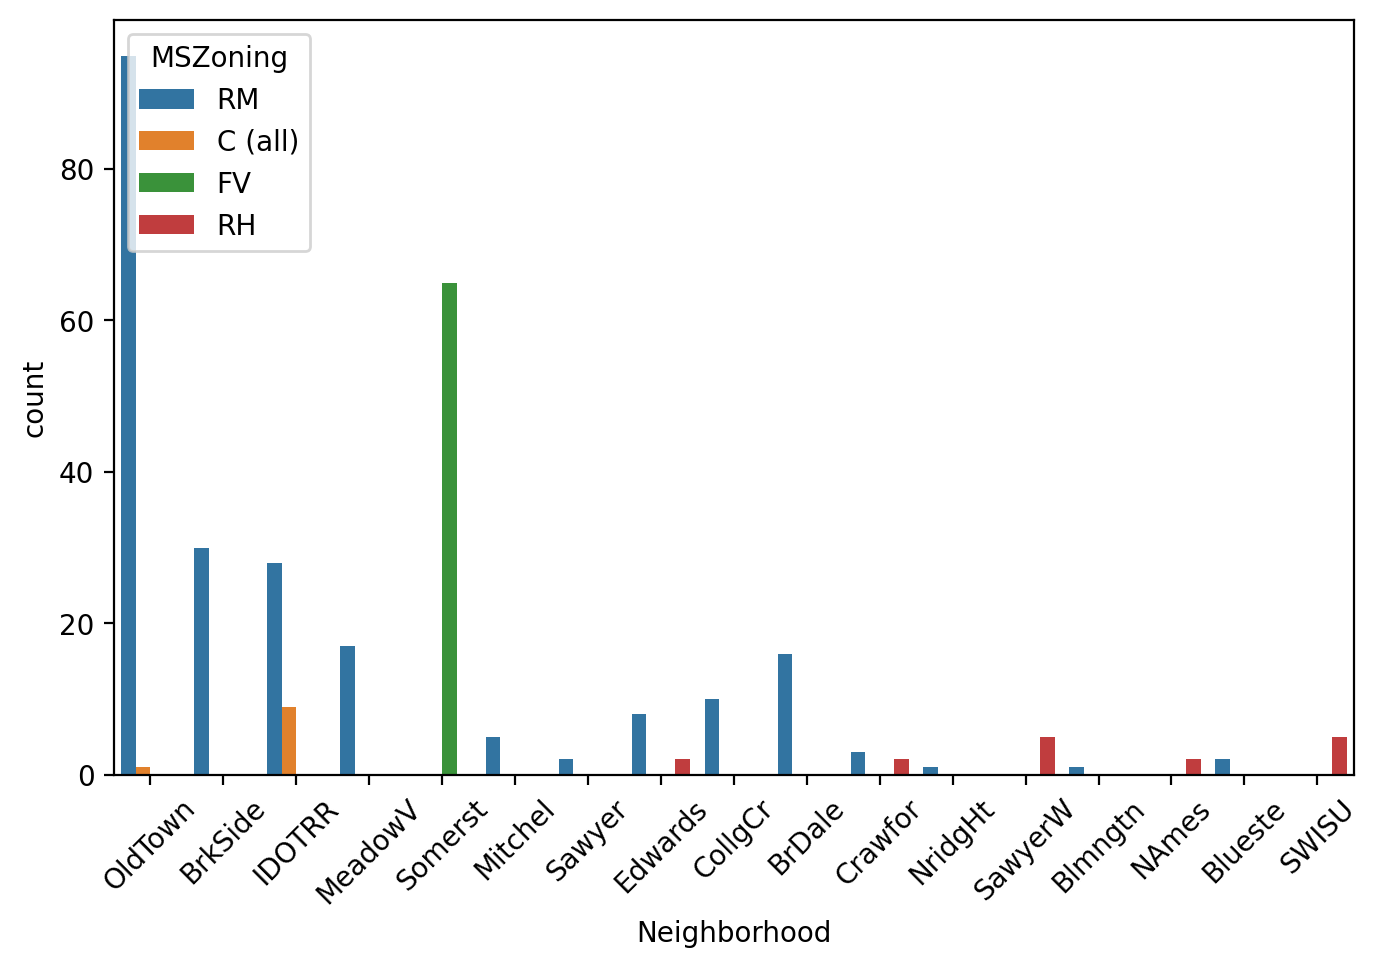

In [19]:
plt.figure(figsize=(8,5),dpi=200)
sns.countplot(x = a["Neighborhood"], hue=a["MSZoning"])
plt.xticks(rotation=45)
plt.show()

* OldTown and IDOTR are the sole commercial areas
* SWISU - NAmes - SawyerW - Crawfor - Edwards are High dens

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

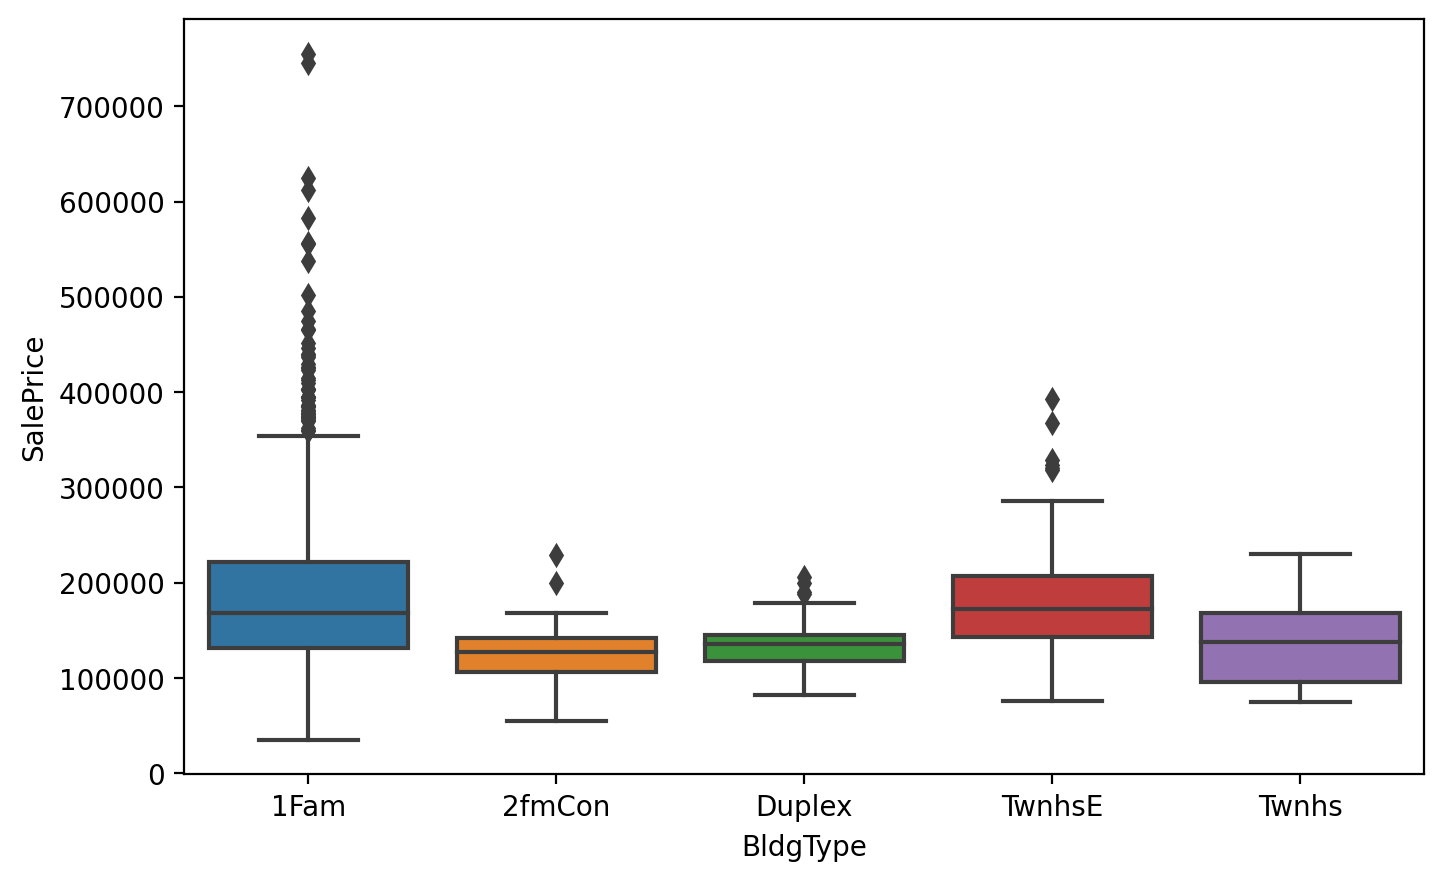

In [20]:
plt.figure(figsize=(8,5),dpi=200)

sns.boxplot(x = df["BldgType"], y = df["SalePrice"])

### 1Fam is the most expensive type

No handles with labels found to put in legend.


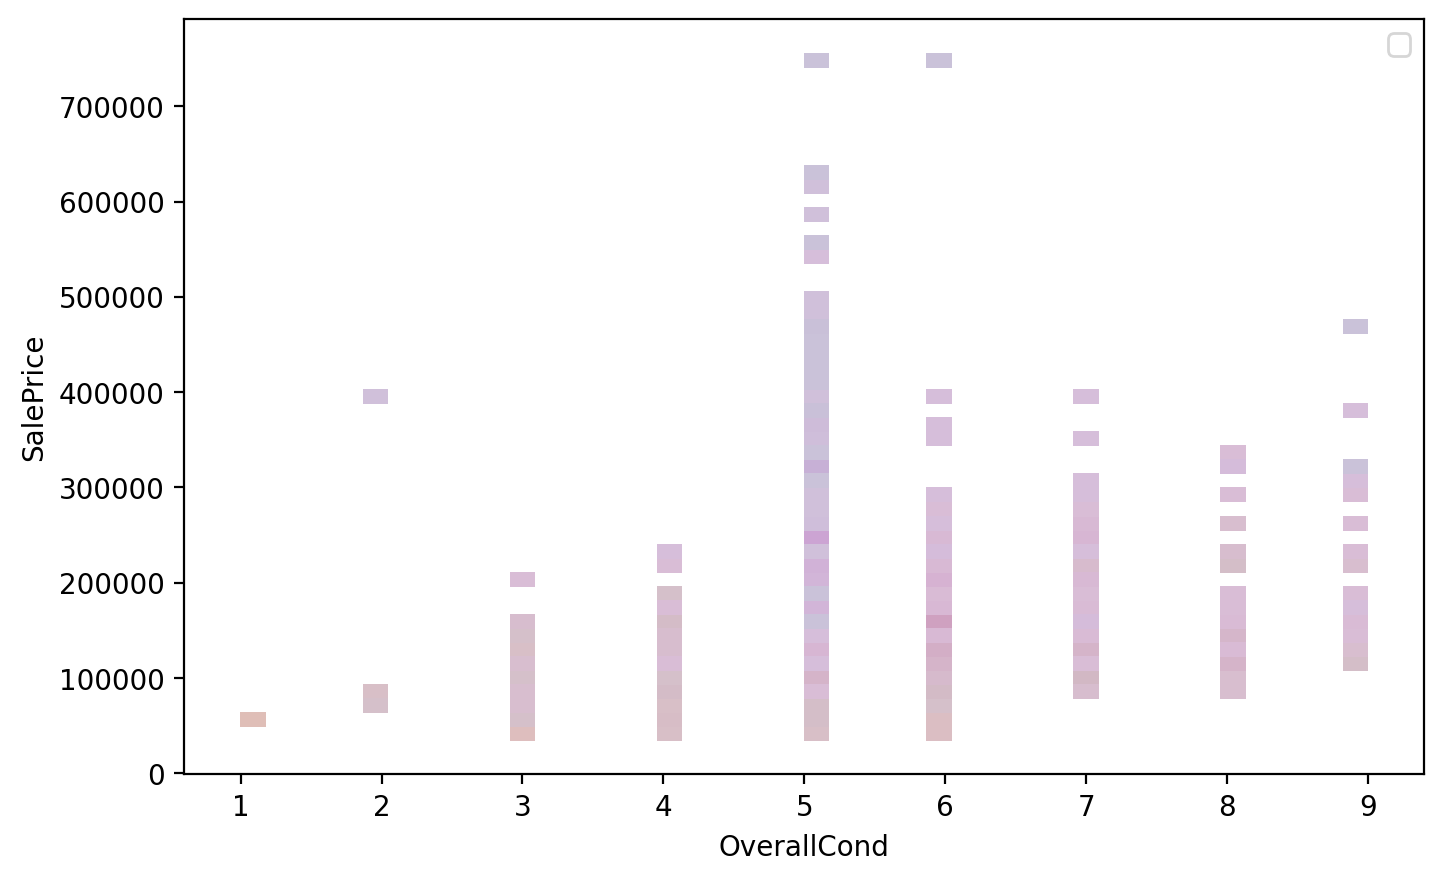

In [21]:
plt.figure(figsize=(8,5),dpi=200)

sns.histplot(x = df["OverallCond"], y=df["SalePrice"], hue=df["OverallQual"])
plt.legend(loc = 1)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

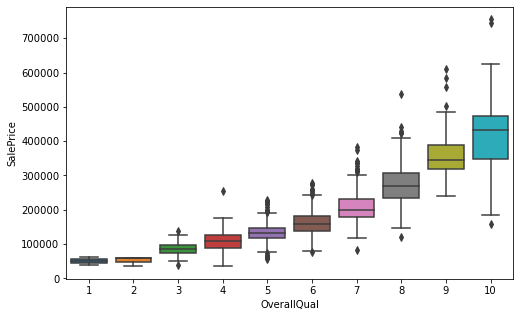

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["OverallQual"], y = df["SalePrice"])

### Clearly a linear relationship between Overall quality and Sale price

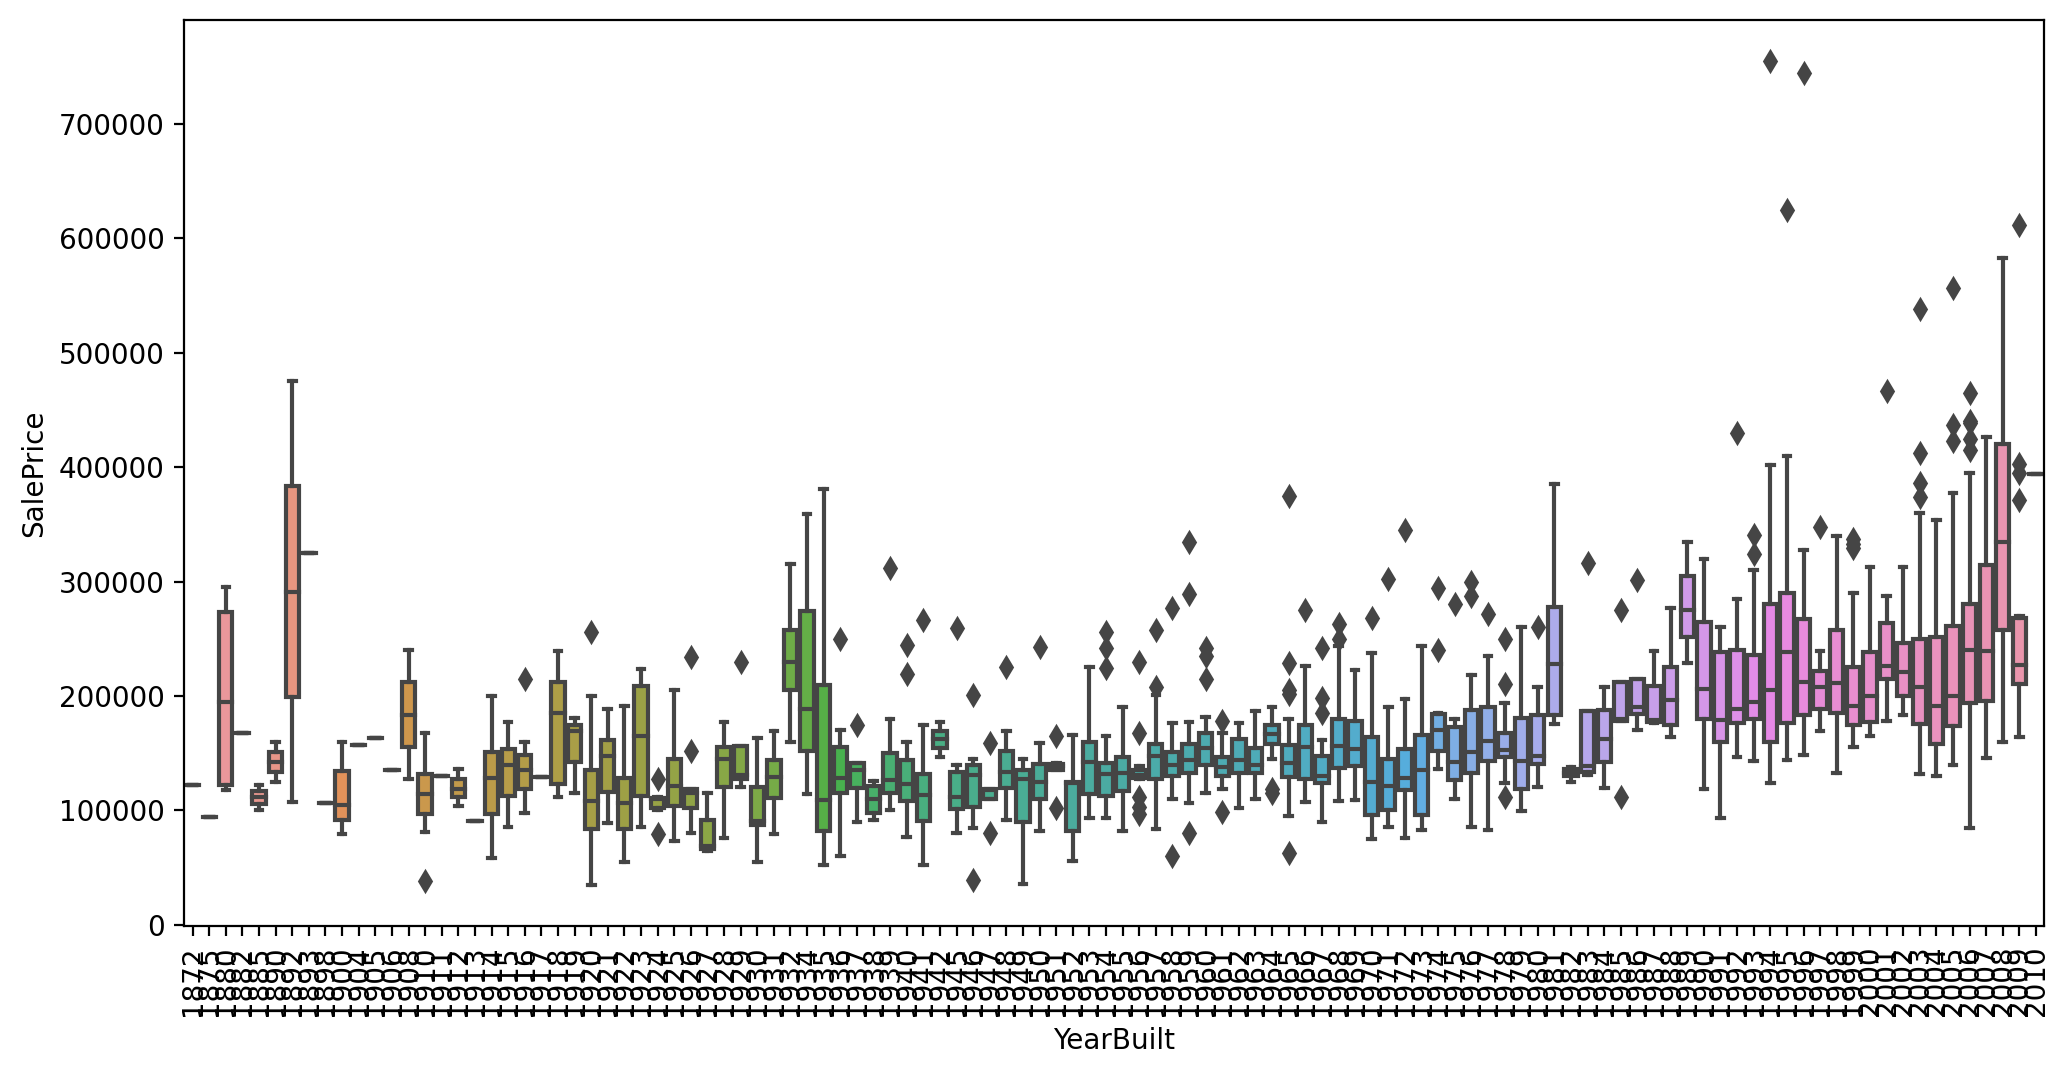

In [23]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(x = df["YearBuilt"], y = df["SalePrice"])
plt.xticks(rotation=90)
plt.show()

### Linear relationship between Year built and Sale price

## Now let's get back to the SalePrice and find some correlations

In [24]:
# Get the abs values of corr
cor = np.sqrt(df.corr() ** 2)

<AxesSubplot:>

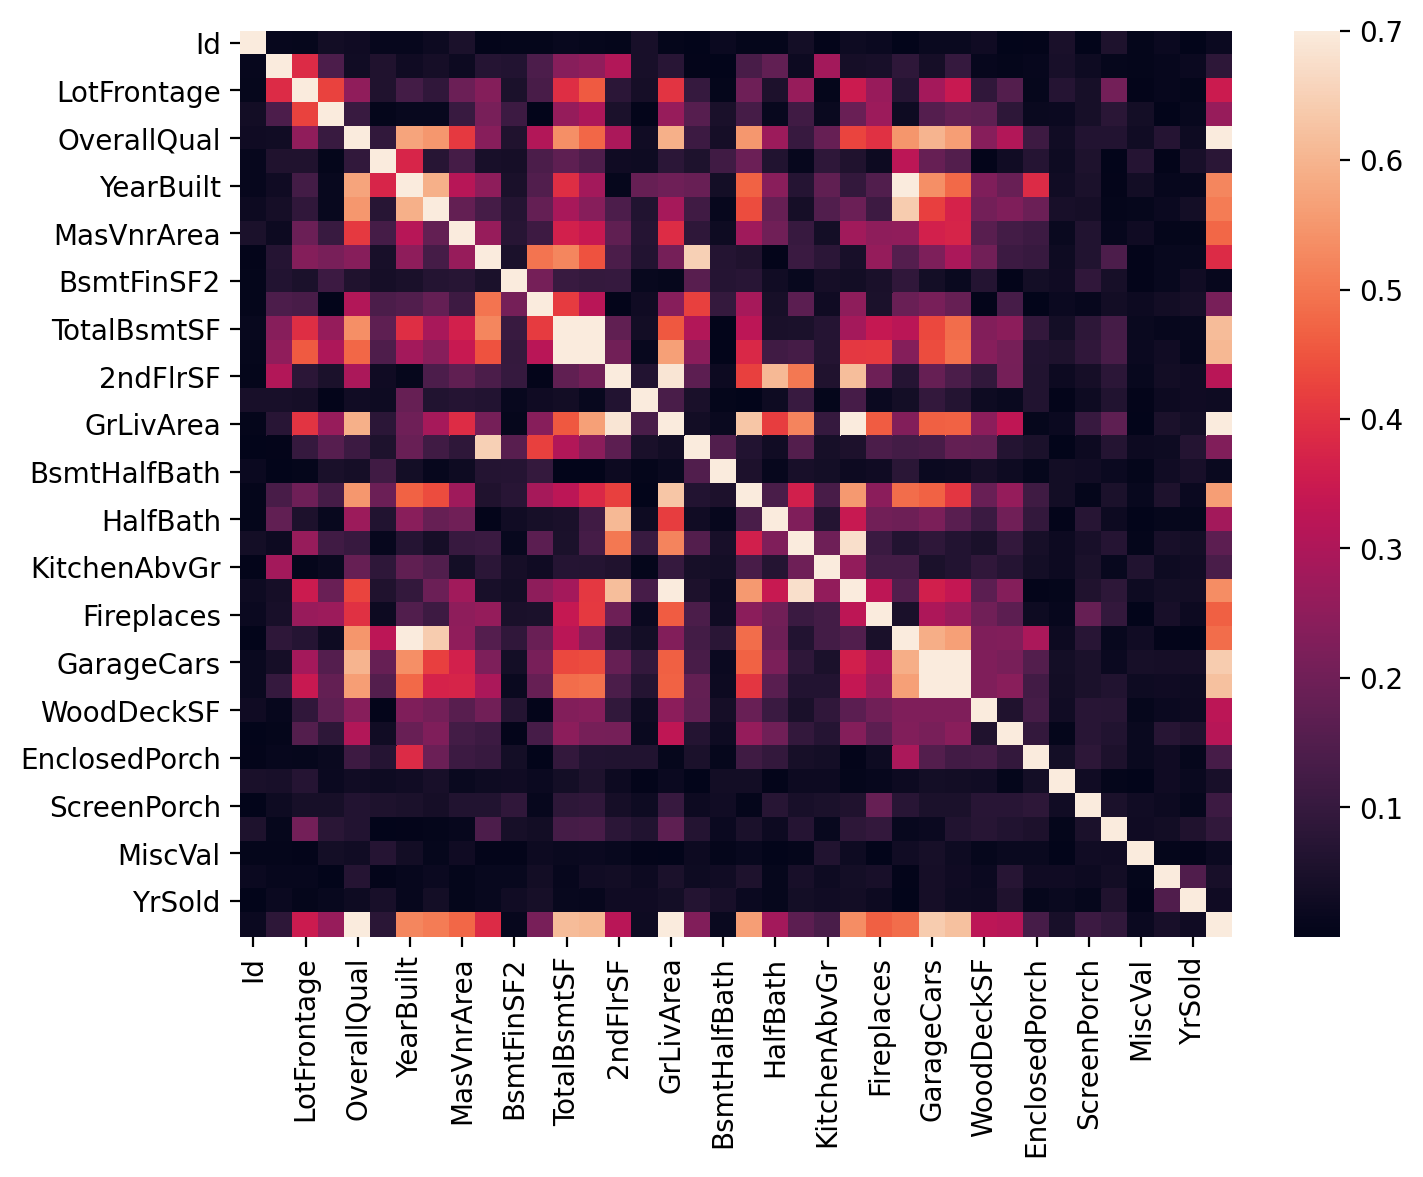

In [25]:
plt.figure(figsize=(8,6),dpi=200)
sns.heatmap(cor,vmax=.7)

In [27]:
# plt.figure(figsize=(8,6),dpi=200)
# a = cor.nlargest(10, 'SalePrice')['SalePrice'].index
# # cm = np.corrcoef(df[a].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(a, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
# plt.show()


### Now i want to see which parameteres contributed the most to the sale price

In [28]:
(df.corr()**2)["SalePrice"].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
Name: SalePrice, dtype: float64

* GarageCars could be neglected because both GarageArea and GarageCars are closely related 

### GrLivArea - OvQuall - TotalBsmtSF - YearBuilt could be our main parameters for regression

## Now let's justify our desired parameters with Scatter plot

### 1. YearBuilt 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

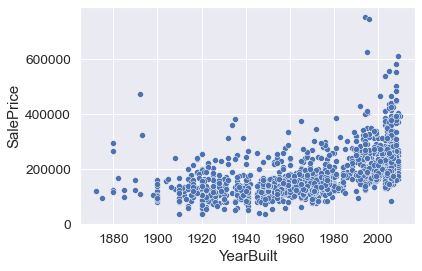

In [29]:
sns.scatterplot(x = df["YearBuilt"], y = df["SalePrice"])

##### This could be a exponential graph 

### 2. OvQual 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

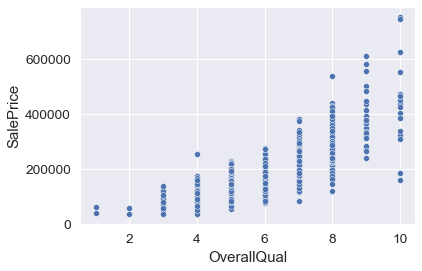

In [30]:
sns.scatterplot(x = df["OverallQual"], y = df["SalePrice"])

### 3. TotalBsmtSF

(0.0, 4000.0)

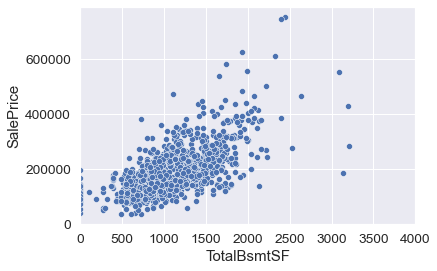

In [31]:
sns.scatterplot(x = df["TotalBsmtSF"], y = df["SalePrice"])
plt.xlim(0,4000)

* Many outliers that should be inspected

### 4. GrLivAre

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

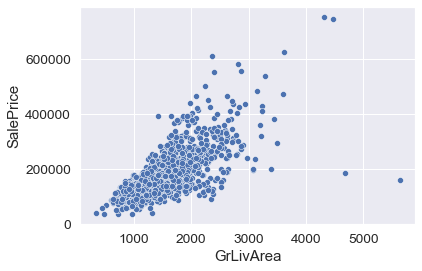

In [32]:
sns.scatterplot(x = df["GrLivArea"], y = df["SalePrice"])


* Many outliers that should be inspected

# Regression (Based on GrLivArea - OvQuall - TotalBsmtSF - YearBuilt)

### 1. Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df[["GrLivArea","O","TotalBsmtSF","YearBuilt"]]
y = df["SalePrice"]

### 2. Preproccessing

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_conv = PolynomialFeatures(degree=2, include_bias=False)


In [ ]:
poly_features = poly_conv.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y, test_size=0.33)

### 3. Evaluating the model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

### 4. Fitting the model

In [ ]:
train_RMSE_list = []
test_RMSE_list = []

for deg in range(1,20):
    
    # Preproccessing
    poly_conv = PolynomialFeatures(degree=deg, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3)

    # Reg
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    MSE_test = metrics.mean_squared_error(y_test,y_test_pred)
    MSE_train = metrics.mean_squared_error(y_train,y_train_pred)
    train_RMSE_list.append(np.sqrt(MSE_train))
    test_RMSE_list.append(np.sqrt(MSE_test))


In [ ]:
plt.plot(range(1,9),train_RMSE_list[:8])
plt.plot(range(1,9),test_RMSE_list[:8])

### 5. Visualising the RMSEs

In [ ]:
plt.plot(range(1,9),train_RMSE_list[:8], label = "Train RMSE")
plt.plot(range(1,9),test_RMSE_list[:8], label = "Test RMSE")

plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()

In [ ]:
    poly_conv = PolynomialFeatures(degree=3, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3)

    # Reg
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)


In [ ]:
y_test_pred

In [ ]:
res = pd.DataFrame({"Y_Pred": y_test_pred,"Y_Test": y_test, 'Residuals' : y_test - y_test_pred})

In [ ]:
 res["Residuals"].apply(lambda p : p%1000)


In [ ]:
res